In [ ]:
import pandas as pd

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
products_category_df = pd.read_csv("/content/product_category_df.csv")

In [ ]:
working_table = products_category_df.copy()

In [ ]:
working_table[working_table['type'] == '1405']['cat_namedesc_kwf'].value_counts()
#= orderlines_qu.merge(products_category_df,how="inner",on="sku")

In [ ]:
working_table.groupby("sku").agg({"product_quantity":"sum","revenue":"sum"}).nlargest(20,columns=['product_quantity'])

In [ ]:
working_table.head(1)

,sku,name,desc,price,in_stock,type,name & desc,cat_namedesc_kwf
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1.0,8696,Silver Rain Design mStand Support Aluminum sup...,", mac"


In [ ]:
working_table['discount_p'] = (working_table['price'] - working_table['unit_price']) / working_table['price']

In [ ]:
working_table['revenue'] = working_table['unit_price'] * working_table['product_quantity']

In [ ]:
top_5 = working_table[working_table['type'].isin(['1296', '5384', '11935397','12175397', '113291716'])]

In [ ]:
working_table[working_table['type'].isin(top_5_list)].groupby("type")['cat_namedesc_kwf'].value_counts().groupby("type").nlargest(1)

type       type       cat_namedesc_kwf                 
113291716  113291716  , apple, iphone                       270
11935397   11935397   , mac, usb, hard drive               1127
12175397   12175397   , mac                                 675
1296       1296       , monitor                             382
5384       5384       , apple, car, ipad, iphone, watch     511
Name: cat_namedesc_kwf, dtype: int64

In [ ]:
working_table.groupby("type")['cat_namedesc_kwf'].value_counts().groupby("type").nlargest(1).to_frame()

In [ ]:
def get_quarter(date):
    if ("2018-01-01" <= date < "2018-04-01"):
        return 'Q1_2018'
    elif ("2017-01-01" <= date < "2017-04-01"):
        return 'Q1_2017'
    elif ("2017-04-01" <= date < "2017-07-01"):
        return 'Q2_2017'
    elif ("2017-07-01" <= date < "2017-10-01"):
        return 'Q3_2017'
    elif ("2017-10-01" <= date <= "2018-01-01"):
        return 'Q4_2017'
    else:
        return None

In [ ]:
working_table['quarter'] = working_table['date'].apply(get_quarter)

In [ ]:
working_table['discount'] = working_table['price'] - working_table['unit_price']

In [ ]:
working_table['date'] = pd.to_datetime(working_table['date'])

In [ ]:
working_table.loc= ""
working_table.loc[~working_table['type'].isin(['51601716', 	'113291716', 	'21561716', 	'85641716', 	'113281716', 	'85651716', 	'24821716', 	'24811716', 	'1298']), 'product_type'] = working_table['type']

In [ ]:
type_yq_kpis = working_table.groupby(["product_type",'year', 'quarter']).agg({"price":"mean", "unit_price":"mean", "discount_p":"mean","product_quantity":"sum","discount":"sum","revenue":"sum"})

In [ ]:
type_yq_kpis

,product_type,year,quarter,price,unit_price,discount_p,product_quantity,discount,revenue,year_quarter
0,"1,44E+11",2017,1,58.813529,71.113529,-0.193925,17,-209.10,1208.93,2017-Q1
1,"1,44E+11",2017,2,74.490000,88.990000,-0.174418,20,-290.00,1779.80,2017-Q2
2,"1,44E+11",2017,3,75.615000,91.865000,-0.201009,16,-260.00,1469.84,2017-Q3
3,"1,44E+11",2017,4,70.615000,75.331250,-0.065560,32,-150.92,2410.60,2017-Q4
4,"1,44E+11",2018,1,88.740000,81.668125,0.067693,16,113.15,1306.69,2018-Q1
...,...,...,...,...,...,...,...,...,...,...
456,IPhone,2017,1,304.687038,285.171394,0.252528,300,5600.99,85292.43,2017-Q1
457,IPhone,2017,2,406.009612,378.840155,0.146154,264,7009.72,101524.59,2017-Q2
458,IPhone,2017,3,483.135679,432.377013,0.135613,795,39591.76,343541.25,2017-Q3
459,IPhone,2017,4,635.184120,578.582566,0.116079,1104,60450.46,640692.55,2017-Q4


In [ ]:
type_yq_kpis['year_quarter'] = type_yq_kpis['year'].astype(str) + '-Q' + type_yq_kpis['quarter'].astype(str)
top_pr_cat = type_yq_kpis.loc[type_yq_kpis['product_type'].isin(['IPhone', '12175397', '11935397', '5384', '1405'])]

<ipython-input-166-b7e4fb91d2ff>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


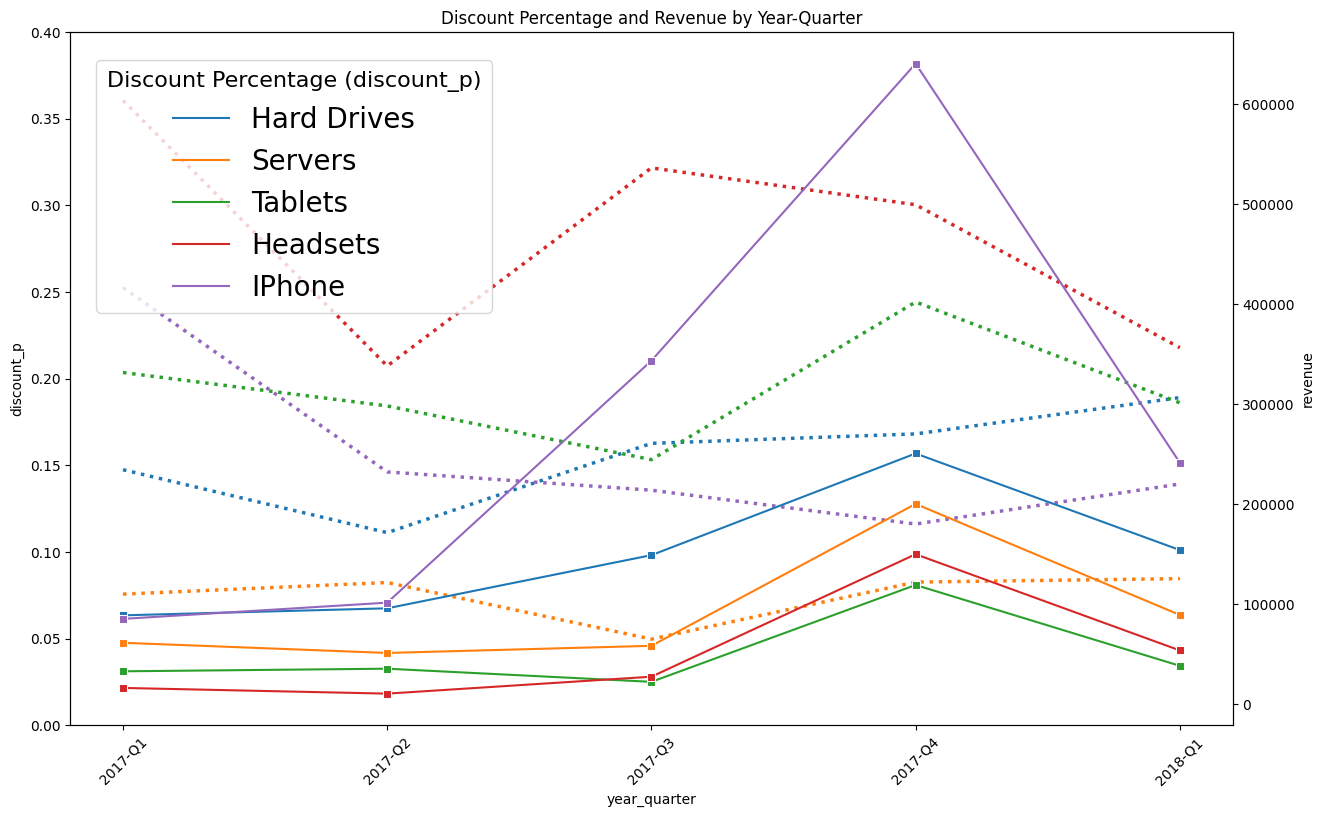

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 9))

# Plot the discount percentage
sns.lineplot(x='year_quarter', y='discount_p', data=top_pr_cat ax=ax1, color='b', hue="product_type", linestyle='dotted', linewidth=2.5)
plt.ylim([0, 0.4])
ax2 = ax1.twinx()

# Customize the plot
# ax1.set_xlabel('Week')
# ax1.set_ylabel('Discount Percentage')
# ax1.set_title('Weekly Discount Percentage type_113291716 ')

# Plot the revenue
sns.lineplot(x='year_quarter', y='revenue', data=top_pr_cat, ax=ax2, hue="product_type", marker='s')
#ax2.set_ylabel('Revenue', color='r')
ax2.legend([], [], frameon=False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
legend = ax1.legend(loc='upper left', bbox_to_anchor=(0.01, 0.98), prop={'size': 20})

legend.set_title('Discount Percentage (discount_p)', prop={'size': 16})
plt.title('Discount Percentage and Revenue by Year-Quarter')

# for x, y in zip(top_pr_cat['year_quarter'], top_pr_cat['revenue']):
#     ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)


plt.show()

In [ ]:
working_table[working_table["name"].str.contains("^.{0,7}apple iphone .*\d{2,3}GB", case=False)]['revenue'].sum()/ working_table['revenue'].sum()

0.1410672810346369